In [ ]:
!pip install -U -q tensorflow==2.9.0
import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.9.0


### transfer learning in tensorflow_fine_tuning

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-08-05 17:33:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.4’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-08-05 17:33:27 (52.6 MB/s) - ‘helper_functions.py.4’ saved [10246/10246]



In [ ]:
from helper_functions import create_tensorboard_callback,plot_loss_curves,unzip_data,walk_through_dir

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-08-05 17:33:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.4’

10_food_classes_10_ 100%[===================>] 160.74M  41.8MB/s    in 4.6s    

2023-08-05 17:33:32 (34.8 MB/s) - ‘10_food_classes_10_percent.zip.4’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/tes

In [ ]:
train_dir = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"


In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                            image_size=IMG_SIZE,
                                                                            label_mode="categorical", 
                                                                            batch_size=BATCH_SIZE) 
test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                           image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=BATCH_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10_percent

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

In [ ]:
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
for images, labels in train_data_10_percent.take(1):
  print(images,labels)

tf.Tensor(
[[[[117.668365   95.58673    61.382652 ]
   [114.64286    89.13776    54.40306  ]
   [114.21938    81.98979    44.433674 ]
   ...
   [ 94.06636    94.21943    83.86737  ]
   [ 99.117386  101.02557    88.12249  ]
   [101.05612   103.05612    89.05612  ]]

  [[122.54592    95.44898    48.87755  ]
   [122.4949     91.63776    45.12755  ]
   [125.515305   90.474495   43.102043 ]
   ...
   [ 98.714325   96.85718    84.85718  ]
   [102.85206   102.71944    90.71944  ]
   [104.90306   106.239784   93.57143  ]]

  [[144.14285   109.92857    47.857143 ]
   [143.7296    107.28571    46.214287 ]
   [147.52042   108.07143    46.55102  ]
   ...
   [108.530594  100.85715    85.19389  ]
   [108.000015  103.443924   90.872536 ]
   [113.066315  110.076515   98.076515 ]]

  ...

  [[ 90.20919    57.20919    22.209192 ]
   [ 86.85714    52.857143   17.857143 ]
   [ 84.83165    49.260223   15.045936 ]
   ...
   [151.16832   123.76529    84.07138  ]
   [150.41322   125.19896    85.84175  ]
   [1

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3),name="input_layer")
x = base_model(inputs)
print(f"shape after passing inputs through base model: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

model_0 = tf.keras.Model(inputs,outputs)

model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_10_percent = model_0.fit(train_data_10_percent,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=int(0.25*len(test_data_10_percent)),
                                 callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                        experiment_name="10_percent_feature_extraction")])

shape after passing inputs through base model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extraction/20230805-173338
Epoch 1/5
24/24 [==============================] - 27s 543ms/step - loss: 1.8676 - accuracy: 0.4120 - val_loss: 1.2866 - val_accuracy: 0.7336
Epoch 2/5
24/24 [==============================] - 5s 189ms/step - loss: 1.0849 - accuracy: 0.7560 - val_loss: 0.8552 - val_accuracy: 0.8191
Epoch 3/5
24/24 [==============================] - 7s 298ms/step - loss: 0.7845 - accuracy: 0.8187 - val_loss: 0.6846 - val_accuracy: 0.8470
Epoch 4/5
24/24 [==============================] - 5s 189ms/step - loss: 0.6502 - accuracy: 0.8520 - val_loss: 0.6008 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 7s 298ms/step - loss: 0.5489 - accuracy: 0.8747 - val_loss: 0.5187 - val_accuracy: 0.8734


In [ ]:
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 7s 77ms/step - loss: 0.5599 - accuracy: 0.8592


[0.5599126815795898, 0.8592000007629395]

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number,layer.name)

0 input_4
1 rescaling_3
2 normalization_3
3 tf.math.truediv_3
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_ac

In [ ]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling_3 (Rescaling)        (None, None, None,   0           ['input_4[0][0]']                
                                3)                                                                
                                                                                                  
 normalization_3 (Normalization  (None, None, None,   7          ['rescaling_3[0][0]']            
 )                              3)                                                   

In [ ]:
model_0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


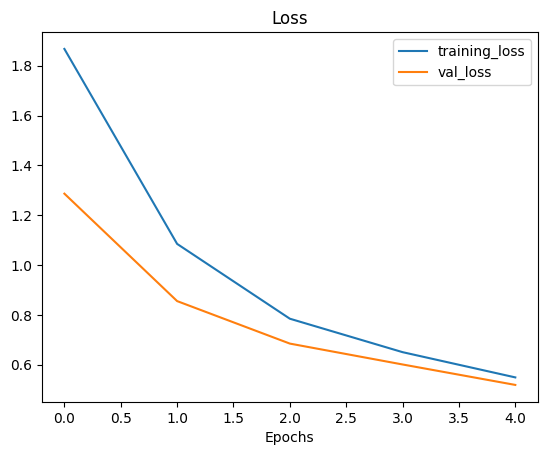

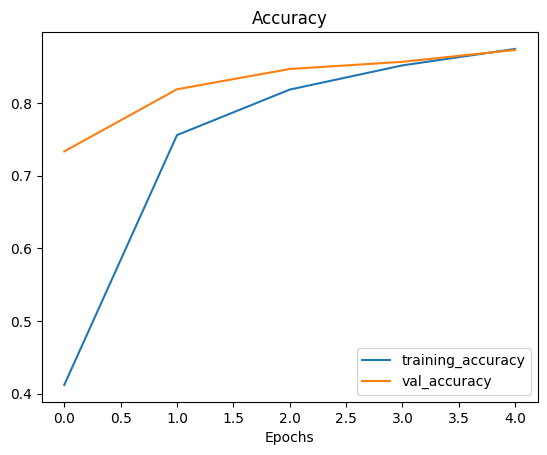

In [ ]:
plot_loss_curves(history_10_percent)

In [ ]:
input_shape = (1, 4, 4, 3)
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


In [ ]:
tf.reduce_mean(input_tensor, axis=[1, 2]) 

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

--2023-08-05 17:34:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.69.128, 173.194.79.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip.3’

10_food_classes_1_p 100%[===================>] 127.42M  36.3MB/s    in 3.9s    

2023-08-05 17:34:47 (33.1 MB/s) - ‘10_food_classes_1_percent.zip.3’ saved [133612354/133612354]



In [ ]:
train_dir_1_percent = "10_food_classes_1_percent/train/"
test_dir = "10_food_classes_1_percent/test/"

In [ ]:
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent/test'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent/test/hamburger'

In [ ]:
IMG_SIZE = (224,224)
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1_percent,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE,
                                                                           batch_size=BATCH_SIZE) #default=32

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE,
                                                                batch_size=BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
print(tf.__version__)

2.9.0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")


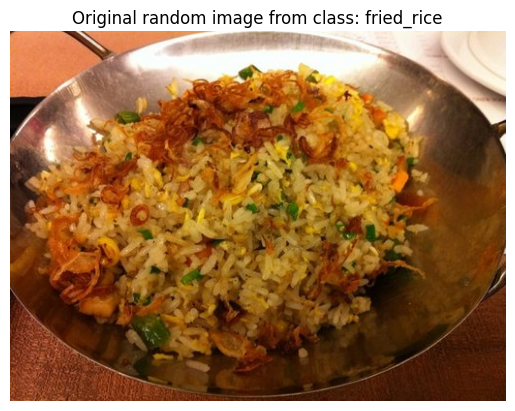

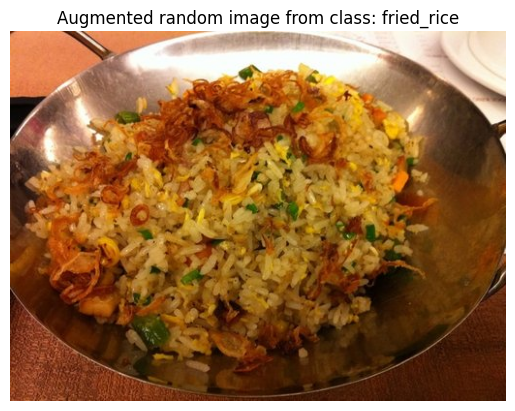

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) 
target_dir = "10_food_classes_1_percent/train/" + target_class 
random_image = random.choice(os.listdir(target_dir)) 
random_image_path = target_dir + "/" + random_image 
img = mpimg.imread(random_image_path) 
plt.imshow(img) 
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); 

augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) 
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) 
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

## Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_1 = keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_1_percent = model_1.fit(train_data_1_percent,
                    epochs=5,
                    steps_per_epoch=len(train_data_1_percent),
                    validation_data=test_data,
                    validation_steps=int(0.25* len(test_data)), 
                    callbacks=[create_tensorboard_callback("transfer_learning", "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20230805-173453
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.4219 - accuracy: 0.1000 - val_loss: 2.2429 - val_accuracy: 0.1595
Epoch 2/5
3/3 [==============================] - 3s 2s/step - loss: 2.1364 - accuracy: 0.2857 - val_loss: 2.1069 - val_accuracy: 0.2632
Epoch 3/5
3/3 [==============================] - 3s 1s/step - loss: 1.9728 - accuracy: 0.4000 - val_loss: 1.9906 - val_accuracy: 0.3454
Epoch 4/5
3/3 [==============================] - 6s 3s/step - loss: 1.8113 - accuracy: 0.5000 - val_loss: 1.8884 - val_accuracy: 0.4359
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6368 - accuracy: 0.6286 - val_loss: 1.8027 - val_accuracy: 0.4622


In [ ]:
model_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

In [ ]:
results_1_percent_data_aug = model_1.evaluate(test_data)
results_1_percent_data_aug

79/79 [==============================] - 8s 95ms/step - loss: 1.7690 - accuracy: 0.4976


[1.7690497636795044, 0.4975999891757965]

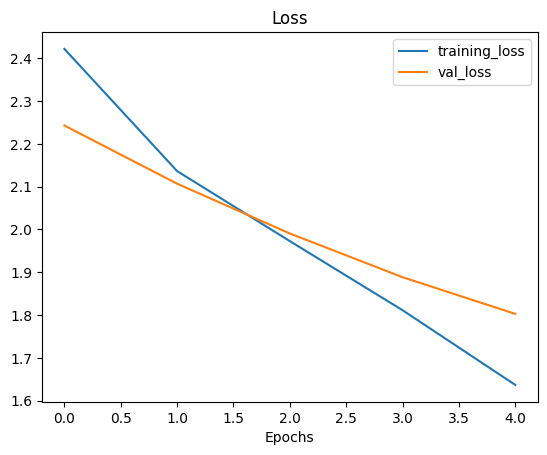

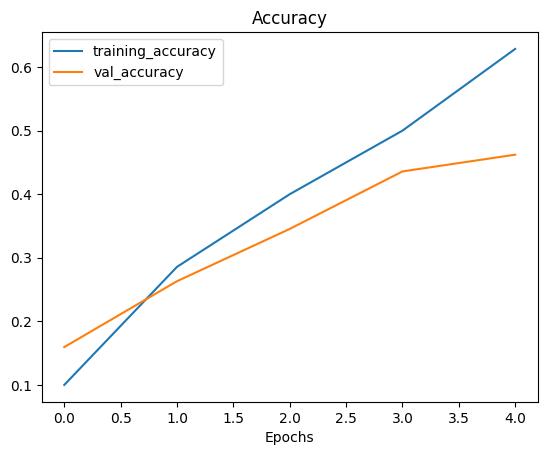

In [ ]:
plot_loss_curves(history_1_percent)

##Model 2: Feature extraction transfer learning with 10% of data and data augmentation

In [ ]:
train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [ ]:
import tensorflow as tf
IMG_SIZE = (224,224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE,
                                                                            )

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=input_shape, name="input_layer") 
x = data_augmentation(inputs) 
x = base_model(x, training=False) 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
              metrics=["accuracy"])


In [ ]:
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt" 

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, 
                                                         save_best_only=True, 
                                                         save_freq="epoch", 
                                                         verbose=1)

## fit the model 2 passing in the ModelCheckpoint callback

In [ ]:
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), 
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"),
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20230805-173547
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9741 - accuracy: 0.3507
Epoch 1: val_loss improved from inf to 1.41752, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 19s 465ms/step - loss: 1.9741 - accuracy: 0.3507 - val_loss: 1.4175 - val_accuracy: 0.6990
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.2755 - accuracy: 0.7267
Epoch 2: val_loss improved from 1.41752 to 0.96400, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 9s 360ms/step - loss: 1.2755 - accuracy: 0.7267 - val_loss: 0.9640 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 0.9800 - accuracy: 0.7667
Epoch 3: val_loss improved from 0.96400 to 0.78282, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==

In [ ]:
model_0.evaluate(test_data)

79/79 [==============================] - 7s 76ms/step - loss: 0.5599 - accuracy: 0.8592


[0.5599126219749451, 0.8592000007629395]

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 7s 78ms/step - loss: 0.6180 - accuracy: 0.8436


[0.6180105805397034, 0.8435999751091003]

In [ ]:
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 9s 109ms/step - loss: 0.6180 - accuracy: 0.8436


[0.6180106401443481, 0.8435999751091003]

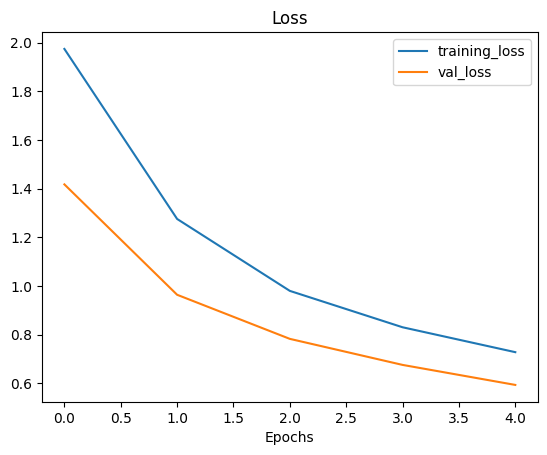

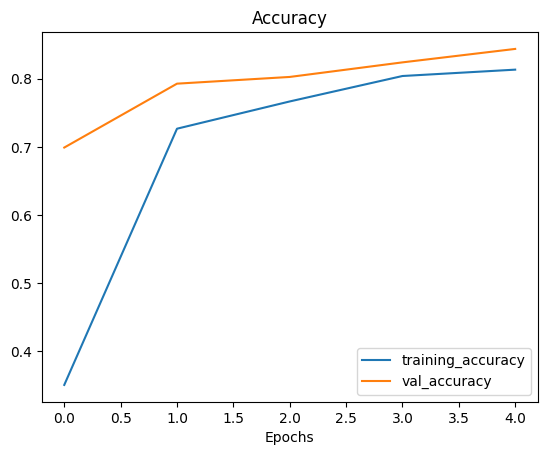

In [ ]:
plot_loss_curves(history_10_percent_data_aug)

## loading in checkpointed weights
loading in checkpinted weights return a model to a specific checkpoint

In [ ]:
model_2.load_weights(checkpoint_path)

In [ ]:
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 7s 77ms/step - loss: 0.6180 - accuracy: 0.8436


In [ ]:
results_10_percent_data_aug == loaded_weights_model_results

False

In [ ]:
results_10_percent_data_aug

[0.6180106401443481, 0.8435999751091003]

In [ ]:
loaded_weights_model_results

[0.6180105209350586, 0.8435999751091003]

In [ ]:
import numpy as np
np.isclose(np.array(results_10_percent_data_aug),np.array(loaded_weights_model_results))

array([ True,  True])

In [ ]:
print((np.array(results_10_percent_data_aug)-np.array(loaded_weights_model_results)))

[1.1920929e-07 0.0000000e+00]


## Model 3: Fine-tuning an existing model on 10% of the data

In [ ]:
model_2.layers

In [ ]:
for layer in model_2.layers:
  print(layer,layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x7fab0028fbb0> True
<keras.engine.sequential.Sequential object at 0x7fab002ace80> True
<keras.engine.functional.Functional object at 0x7fab23f1d690> False
<keras.layers.pooling.global_average_pooling2d.GlobalAveragePooling2D object at 0x7faad0e58be0> True
<keras.layers.core.dense.Dense object at 0x7fab003ad690> True


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 tf.math.truediv_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
print(len(model_2.layers[2].trainable_variables))

0


In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable = False

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001), 
                metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
for layer_number, layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 tf.math.truediv_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
print(len(model_2.trainable_variables))

12


In [ ]:
fine_tune_epochs = initial_epochs + 5

history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                               epochs=fine_tune_epochs,
                                               validation_data=test_data,
                                               initial_epoch=history_10_percent_data_aug.epoch[-1], # start from previous last epoch
                                               validation_steps=int(0.25 * len(test_data)),
                                               callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/10_percent_fine_tune_last_10/20230805-173735
Epoch 5/10
24/24 [==============================] - 19s 388ms/step - loss: 0.5967 - accuracy: 0.8333 - val_loss: 0.4818 - val_accuracy: 0.8322
Epoch 6/10
24/24 [==============================] - 8s 293ms/step - loss: 0.4904 - accuracy: 0.8573 - val_loss: 0.4471 - val_accuracy: 0.8306
Epoch 7/10
24/24 [==============================] - 9s 341ms/step - loss: 0.4291 - accuracy: 0.8693 - val_loss: 0.4344 - val_accuracy: 0.8470
Epoch 8/10
24/24 [==============================] - 7s 273ms/step - loss: 0.3975 - accuracy: 0.8760 - val_loss: 0.4169 - val_accuracy: 0.8454
Epoch 9/10
24/24 [==============================] - 8s 328ms/step - loss: 0.3467 - accuracy: 0.8947 - val_loss: 0.4268 - val_accuracy: 0.8438
Epoch 10/10
24/24 [==============================] - 7s 277ms/step - loss: 0.3033 - accuracy: 0.9200 - val_loss: 0.4087 - val_accuracy: 0.8487


In [ ]:
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 9s 101ms/step - loss: 0.4127 - accuracy: 0.8588


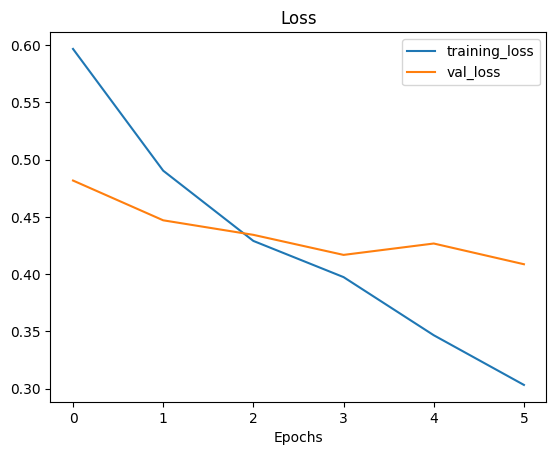

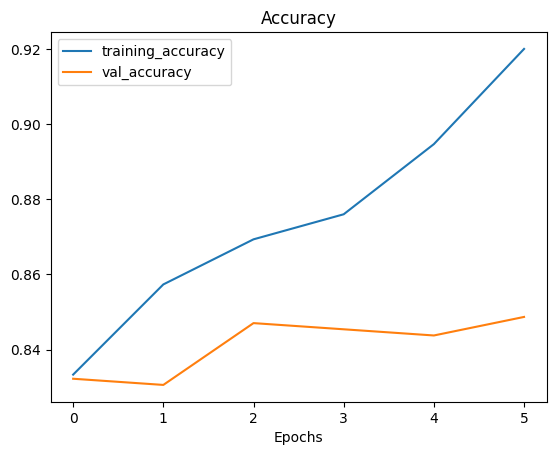

In [ ]:
plot_loss_curves(history_fine_10_percent_data_aug)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') 
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.35066667199134827, 0.7266666889190674, 0.7666666507720947, 0.8040000200271606, 0.8133333325386047, 0.8333333134651184, 0.8573333621025085, 0.8693333268165588, 0.8759999871253967, 0.8946666717529297, 0.9200000166893005]


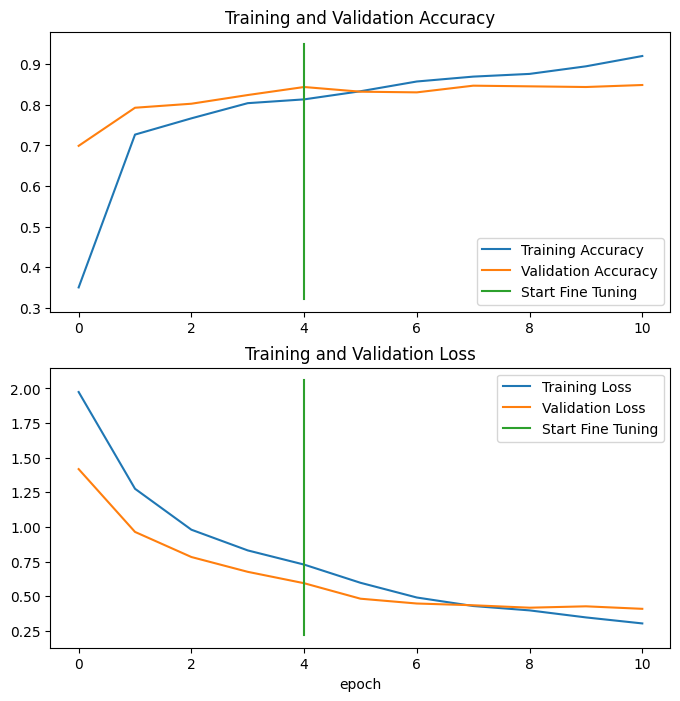

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_percent_data_aug,
                 initial_epochs=5)

##Model 4: Fine-tuning an existing model all of the data

In [ ]:
!wget wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

--2023-08-05 17:38:50--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-08-05 17:38:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.126.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.126.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.3’

10_food_classes_all 100%[===================>] 495.13M  39.4MB/s    in 13s     

2023-08-05 17:39:03 (36.9 MB/s) - ‘10_food_classes_all_data.zip.3’ saved [519183241/519183241]

FINISHED --2023-08-05 17:39:03--
Total wall clock time: 14s
Downloaded: 1 files, 495M in 13s (36.9 MB/s)


In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                 label_mode="categorical",
                                                                                 image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)


Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 8s 87ms/step - loss: 0.4127 - accuracy: 0.8588


[0.4127451777458191, 0.8587999939918518]

In [ ]:
results_fine_tune_10_percent

[0.41274505853652954, 0.8587999939918518]

In [ ]:
checkpoint_dir = "ten_percent_model_checkpoints_weights"
latest_weights = tf.train.latest_checkpoint(checkpoint_dir)
model_2.load_weights(latest_weights)

In [ ]:
model_2.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.6180 - accuracy: 0.8436


[0.6180106997489929, 0.8435999751091003]

In [ ]:
results_10_percent_data_aug

[0.6180106401443481, 0.8435999751091003]

In [ ]:
for layer_number,layer in enumerate(model_2.layers):
  print(layer_number,layer.name,layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [ ]:
for layer_number,layer in enumerate(model_2.layers[2].layers):
  print(layer_number,layer.name,layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 tf.math.truediv_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeez

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])

In [ ]:
fine_tune_epochs = initial_epochs + 5

history_10_classs_full = model_2.fit(train_data_10_classes_full,
                                     epochs=fine_tune_epochs,
                                     validation_data=test_data,
                                     validation_steps=int(0.25 * len(test_data)),
                                     initial_epoch=history_10_percent_data_aug.epoch[-1],
                                     callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                            experiment_name="full_10_classes_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classes_fine_tune_last_10/20230805-173934
Epoch 5/10
235/235 [==============================] - 55s 205ms/step - loss: 0.6473 - accuracy: 0.7939 - val_loss: 0.3732 - val_accuracy: 0.8766
Epoch 6/10
235/235 [==============================] - 46s 196ms/step - loss: 0.5158 - accuracy: 0.8328 - val_loss: 0.3716 - val_accuracy: 0.8816
Epoch 7/10
235/235 [==============================] - 43s 182ms/step - loss: 0.4544 - accuracy: 0.8576 - val_loss: 0.3259 - val_accuracy: 0.8898
Epoch 8/10
235/235 [==============================] - 46s 194ms/step - loss: 0.4191 - accuracy: 0.8631 - val_loss: 0.3347 - val_accuracy: 0.8865
Epoch 9/10
235/235 [==============================] - 42s 176ms/step - loss: 0.3805 - accuracy: 0.8752 - val_loss: 0.2893 - val_accuracy: 0.8964
Epoch 10/10
235/235 [==============================] - 44s 184ms/step - loss: 0.3427 - accuracy: 0.8860 - val_loss: 0.2878 - val_accuracy: 0.9095


In [ ]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 7s 79ms/step - loss: 0.2658 - accuracy: 0.9148


[0.26578179001808167, 0.9147999882698059]

5
11
[0.35066667199134827, 0.7266666889190674, 0.7666666507720947, 0.8040000200271606, 0.8133333325386047, 0.7938666939735413, 0.8327999711036682, 0.8575999736785889, 0.8630666732788086, 0.8751999735832214, 0.8859999775886536]


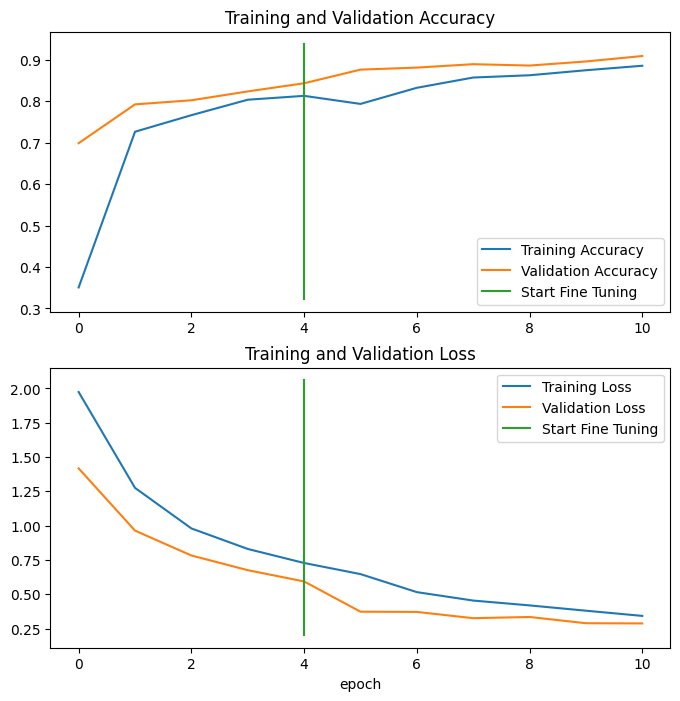

In [ ]:
compare_historys(original_history=history_10_percent_data_aug,
                 new_history=history_10_classs_full,
                 initial_epochs=5)

In [ ]:
pip install -U tensorboard

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 68.2 MB/s eta 0:00:00
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.0 requires tensorboard<2.10,>=2.9, but you have tens

In [ ]:
!tensorboard dev upload --logdir ./transfer_learning \
  --name "Transfer learning experiments" \
  --description "A series of different transfer learning experiments with varying amounts of data and fine-tuning:https://colab.research.google.com/drive/1OIUWoTsZJF17bngar2Xaf09VoduNtA5q#scrollTo=vHzDdTL-hd4I" \
  --one_shot 


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/WH7aM0drRu6No6GFLWbXQA/

[2023-08-05T17:48:03] Started scanning logdir.
[2023-08-05T17:48:27] Total uploaded: 606 scalars, 0 tensors, 19 binary objects (16.1 MB)
[2023-08-05T17:48:27] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/WH7aM0drRu6No6GFLWbXQA/


In [ ]:
! tensorboard dev list

https://tensorboard.dev/experiment/WH7aM0drRu6No6GFLWbXQA/
	Name                 Transfer learning experiments
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning:https://colab.research.google.com/drive/1OIUWoTsZJF17bngar2Xaf09VoduNtA5q#scrollTo=vHzDdTL-hd4I
	Id                   WH7aM0drRu6No6GFLWbXQA
	Created              2023-08-05 17:48:03 (36 seconds ago)
	Updated              2023-08-05 17:48:27 (12 seconds ago)
	Runs                 38
	Tags                 5
	Scalars              606
	Tensor bytes         0
	Binary object bytes  16845300
https://tensorboard.dev/experiment/JnrSaYVNRTOAGV9kYNo6YQ/
	Name                 Transfer learning experiments
	Description          A series of different transfer learning experiments with varying amounts of data and fine-tuning
	Id                   JnrSaYVNRTOAGV9kYNo6YQ
	Created              2023-08-05 17:46:25 (2 minutes ago)
	Updated              2023-08-05 17:46:50 (1 min